##**Objective**:

The primary objective of this experiment is to develop, implement, and assess machine learning models for the automated detection of SQL injection attacks in web application queries. The aim is to enhance the overall security of web applications by accurately identifying and mitigating SQL injection vulnerabilities, a common and potentially severe cybersecurity threat.


In [ ]:
import random
import pandas as pd

# List of legitimate SQL queries
legitimate_queries = [
    "SELECT * FROM users WHERE username = 'JohnDoe' AND password = 'MySecurePassword123';",
    "SELECT id, name, email FROM customers WHERE country = 'USA';",
    "INSERT INTO products (name, price, quantity) VALUES ('Product1', 19.99, 100);",
    "UPDATE employees SET designation = 'Manager' WHERE department = 'HR';",
    "SELECT COUNT(*) FROM orders WHERE customer_id = 123;",
    "DELETE FROM employees WHERE emp_id = 456;",
    # Add more legitimate queries here...
]

# List of SQL injection attack templates
sql_injection_templates = [
    "'; DROP TABLE users; --",
    "' OR 1=1; --",
    "' UNION SELECT table_name, column_name FROM information_schema.columns; --",
    "'; SELECT * FROM sensitive_data WHERE 1=1; --",
    "' OR 'x'='x'; --",
    "' UNION SELECT 1,2,3; --",
    # Add more SQL injection attack templates here...
]

# Function to generate SQL injection attack queries
def generate_sql_injection_query(legitimate_query, injection_template):
    return legitimate_query.replace("';", injection_template)

# Create the dataset with 5000 entries
dataset = []

# Generate legitimate queries
for _ in range(5000):
    query = random.choice(legitimate_queries)
    dataset.append((query, 0))  # 0 represents legitimate query

# Generate SQL injection attack queries
for _ in range(5000):
    legitimate_query = random.choice(legitimate_queries)
    injection_template = random.choice(sql_injection_templates)
    sql_injection_query = generate_sql_injection_query(legitimate_query, injection_template)
    dataset.append((sql_injection_query, 1))  # 1 represents SQL injection attack

# Shuffle the dataset to randomize the order
random.shuffle(dataset)

# Create a pandas DataFrame
df = pd.DataFrame(dataset, columns=["query", "label"])

# Save the dataset to a CSV file (optional)
df.to_csv("sql_injection_dataset.csv", index=False)

print("Dataset created with 10000 entries and saved to 'sql_injection_dataset.csv'.")

print(df)
df.head()


Dataset created with 10000 entries and saved to 'sql_injection_dataset.csv'.
                                                  query  label
0     INSERT INTO products (name, price, quantity) V...      0
1     INSERT INTO products (name, price, quantity) V...      1
2     SELECT id, name, email FROM customers WHERE co...      0
3     SELECT * FROM users WHERE username = 'JohnDoe'...      1
4     INSERT INTO products (name, price, quantity) V...      0
...                                                 ...    ...
9995  SELECT * FROM users WHERE username = 'JohnDoe'...      0
9996  INSERT INTO products (name, price, quantity) V...      0
9997          DELETE FROM employees WHERE emp_id = 456;      1
9998  SELECT * FROM users WHERE username = 'JohnDoe'...      1
9999  UPDATE employees SET designation = 'Manager' W...      0

[10000 rows x 2 columns]


,query,label
0,"INSERT INTO products (name, price, quantity) V...",0
1,"INSERT INTO products (name, price, quantity) V...",1
2,"SELECT id, name, email FROM customers WHERE co...",0
3,SELECT * FROM users WHERE username = 'JohnDoe'...,1
4,"INSERT INTO products (name, price, quantity) V...",0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
# Split the dataset into features (queries) and labels (0 for legitimate, 1 for SQL injection)
X = df["query"]
y = df["label"]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)




In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=2)
clf.fit(X_train_vectorized, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.760
Confusion Matrix:
[[ 469  480]
 [   0 1051]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.49      0.66       949
           1       0.69      1.00      0.81      1051

    accuracy                           0.76      2000
   macro avg       0.84      0.75      0.74      2000
weighted avg       0.84      0.76      0.74      2000



In [ ]:
# Split the dataset into features (queries) and labels (0 for legitimate, 1 for SQL injection)
X = df["query"]
y = df["label"]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical representation using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Create and train the Support Vector Machine (SVM) classifier
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train_vectorized, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.76
Confusion Matrix:
[[668 314]
 [168 850]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       982
           1       0.73      0.83      0.78      1018

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



In [ ]:
# Create and train the Support Vector Machine (SVM) classifier
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train_vectorized, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.76
Confusion Matrix:
[[668 314]
 [168 850]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       982
           1       0.73      0.83      0.78      1018

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
   100       123   19       456   99       and  column_name   columns  \
0  0.0  0.191736  0.0  0.206597  0.0  0.200435     0.049535  0.049535   
1  1.0  0.000000  1.0  0.000000  1.0  0.000000     0.000000  0.000000   

      count   country  ...       set     table  table_name     union  \
0  0.191736  0.203697  ...  0.197535  0.052434    0.049535  0.097257   
1  0.000000  0.000000  ...  0.000000  0.000000    0.000000  0.000000   

     update       usa  username     users  values     where  
0  0.197535  0.203697  0.200435  0.252869     0.0  1.051105  
1  0.000000  0.000000  0.000000  0.000000     1.0  0.000000  

[2 rows x 48 columns]
Cluster Assignments:
                                                  query  cluster
0     INSERT INTO products (name, price, quantity) V...        1
1     SELECT * FROM users WHERE username = 'JohnDoe'...        0
2     UPDATE employees SET designation = 'Manager' W...        0
3     SELECT id, name, email FROM customers WHERE co... 

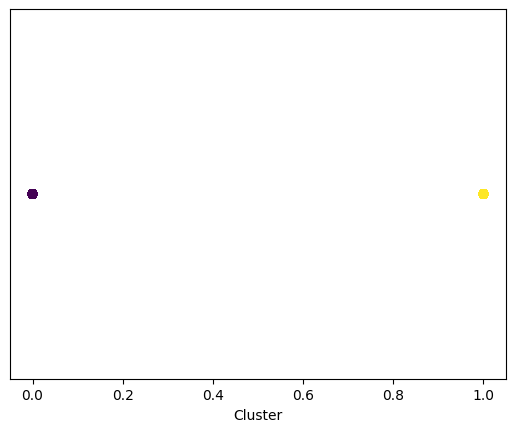

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convert text data to numerical representation using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["query"])

# Apply K-means clustering
num_clusters = 2  # Two clusters: legitimate queries and SQL injection queries
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Get cluster assignments and cluster centers
cluster_assignments = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Visualize cluster centers (optional)
feature_names = vectorizer.get_feature_names_out()
df_cluster_centers = pd.DataFrame(cluster_centers, columns=feature_names)
print("Cluster Centers:")
print(df_cluster_centers)

# Add cluster assignment to the original DataFrame
df["cluster"] = cluster_assignments

# Print the cluster assignments
print("Cluster Assignments:")
print(df[["query", "cluster"]])

# Plot the clusters (2D visualization for illustration purposes, may not be the best representation)
# Note: In practice, we can't visualize clusters directly when we have high-dimensional data.
plt.scatter(df["cluster"], [1] * len(df), c=df["cluster"])
plt.xlabel("Cluster")
plt.yticks([])
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Choose the number of neighbors (K) here
knn.fit(X_train_vectorized, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.75
Confusion Matrix:
[[663 332]
 [164 841]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       995
           1       0.72      0.84      0.77      1005

    accuracy                           0.75      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.76      0.75      0.75      2000

